# Configuração do Ambiente

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm.notebook import tqdm_notebook as tqdm

# Preparação dos dados

### Jogos

In [3]:
games = pd.read_csv('games.csv')

In [4]:
games

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


### Campeões

In [5]:
champs = pd.read_json('champion_info.json')
champs

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K..."
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'k..."
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key':..."
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'k..."
...,...,...,...
91,champion,7.17.2,"{'title': 'the Blade's Shadow', 'id': 91, 'key..."
92,champion,7.17.2,"{'title': 'the Exile', 'id': 92, 'key': 'Riven..."
96,champion,7.17.2,"{'title': 'the Mouth of the Abyss', 'id': 96, ..."
98,champion,7.17.2,"{'title': 'the Eye of Twilight', 'id': 98, 'ke..."


In [6]:
champs_list = champs['data'].to_list()
champs_list

[{'title': 'the Dark Child', 'id': 1, 'key': 'Annie', 'name': 'Annie'},
 {'title': 'The Judicator', 'id': 10, 'key': 'Kayle', 'name': 'Kayle'},
 {'title': 'the Magus Ascendant',
  'id': 101,
  'key': 'Xerath',
  'name': 'Xerath'},
 {'title': 'the Half-Dragon', 'id': 102, 'key': 'Shyvana', 'name': 'Shyvana'},
 {'title': 'the Nine-Tailed Fox', 'id': 103, 'key': 'Ahri', 'name': 'Ahri'},
 {'title': 'the Outlaw', 'id': 104, 'key': 'Graves', 'name': 'Graves'},
 {'title': 'the Tidal Trickster', 'id': 105, 'key': 'Fizz', 'name': 'Fizz'},
 {'title': "the Thunder's Roar",
  'id': 106,
  'key': 'Volibear',
  'name': 'Volibear'},
 {'title': 'the Pridestalker', 'id': 107, 'key': 'Rengar', 'name': 'Rengar'},
 {'title': 'the Wuju Bladesman',
  'id': 11,
  'key': 'MasterYi',
  'name': 'Master Yi'},
 {'title': 'the Arrow of Retribution',
  'id': 110,
  'key': 'Varus',
  'name': 'Varus'},
 {'title': 'the Titan of the Depths',
  'id': 111,
  'key': 'Nautilus',
  'name': 'Nautilus'},
 {'title': 'the Machi

In [7]:
champs = pd.DataFrame(champs_list)
champs

,title,id,key,name
0,the Dark Child,1,Annie,Annie
1,The Judicator,10,Kayle,Kayle
2,the Magus Ascendant,101,Xerath,Xerath
3,the Half-Dragon,102,Shyvana,Shyvana
4,the Nine-Tailed Fox,103,Ahri,Ahri
...,...,...,...,...
133,the Blade's Shadow,91,Talon,Talon
134,the Exile,92,Riven,Riven
135,the Mouth of the Abyss,96,KogMaw,Kog'Maw
136,the Eye of Twilight,98,Shen,Shen


In [8]:
champs['name'][champs['id']==10].to_list()[0]

'Kayle'

### Summoner speels (Feitiços de invocador)

In [9]:
sum_spels = pd.read_json('summoner_spell_info.json')
sum_spels

,type,version,data
1,summoner,7.17.2,"{'id': 1, 'summonerLevel': 6, 'name': 'Cleanse..."
11,summoner,7.17.2,"{'id': 11, 'summonerLevel': 10, 'name': 'Smite..."
12,summoner,7.17.2,"{'id': 12, 'summonerLevel': 6, 'name': 'Telepo..."
13,summoner,7.17.2,"{'id': 13, 'summonerLevel': 1, 'name': 'Clarit..."
14,summoner,7.17.2,"{'id': 14, 'summonerLevel': 10, 'name': 'Ignit..."
21,summoner,7.17.2,"{'id': 21, 'summonerLevel': 4, 'name': 'Barrie..."
3,summoner,7.17.2,"{'id': 3, 'summonerLevel': 4, 'name': 'Exhaust..."
30,summoner,7.17.2,"{'id': 30, 'summonerLevel': 1, 'name': 'To the..."
31,summoner,7.17.2,"{'id': 31, 'summonerLevel': 1, 'name': 'Poro T..."
32,summoner,7.17.2,"{'id': 32, 'summonerLevel': 1, 'name': 'Mark',..."


Os dados dos feitiços de invocador estão todos em dicionários na coluna 'data'

In [10]:
sum_spels_list = sum_spels['data'].to_list()
sum_spels_list

[{'id': 1,
  'summonerLevel': 6,
  'name': 'Cleanse',
  'key': 'SummonerBoost',
  'description': 'Removes all disables (excluding suppression and airborne) and summoner spell debuffs affecting your champion and lowers the duration of incoming disables by 65% for 3 seconds.'},
 {'id': 11,
  'summonerLevel': 10,
  'name': 'Smite',
  'key': 'SummonerSmite',
  'description': 'Deals 390-1000 true damage (depending on champion level) to target epic, large, or medium monster or enemy minion. Restores Health based on your maximum life when used against monsters.'},
 {'id': 12,
  'summonerLevel': 6,
  'name': 'Teleport',
  'key': 'SummonerTeleport',
  'description': 'After channeling for 4.5 seconds, teleports your champion to target allied structure, minion, or ward.'},
 {'id': 13,
  'summonerLevel': 1,
  'name': 'Clarity',
  'key': 'SummonerMana',
  'description': "Restores 50% of your champion's maximum Mana. Also restores allies for 25% of their maximum Mana."},
 {'id': 14,
  'summonerLevel

In [11]:
sum_spels = pd.DataFrame(sum_spels_list)

### Atualização dos dados da tabela games

In [12]:
games.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [13]:
# Troca o id pelo nome dos campeões
colunas = ['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
           't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']
for coluna in tqdm(colunas):
  games[coluna] = games[coluna].apply(lambda x: champs['name'][champs['id']==x].to_list()[0] )

  0%|          | 0/10 [00:00<?, ?it/s]

In [14]:
# Troca o id pelo nome do feitiço de invocador
colunas = ['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
           't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5_sum1', 't1_champ5_sum2',
           't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3_sum1', 't2_champ3_sum2',
           't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5_sum1', 't2_champ5_sum2']
for coluna in tqdm(colunas):
  games[coluna] = games[coluna].apply(lambda x: sum_spels['name'][sum_spels['id']==x].to_list()[0] )

  0%|          | 0/20 [00:00<?, ?it/s]

In [15]:
games

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


# Análise

In [16]:
games

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [24]:
games.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

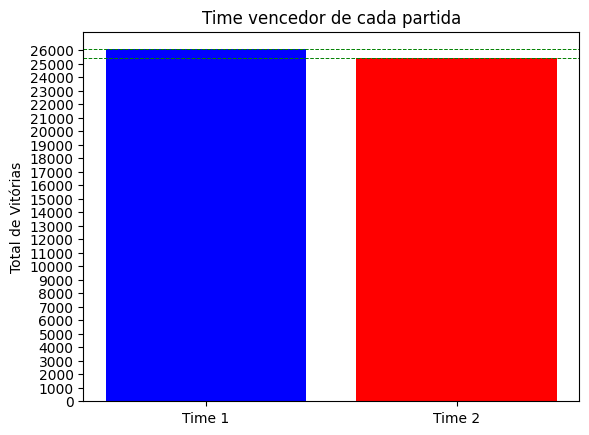

In [36]:
labels = ['Time 1', 'Time 2']
colors = ['blue', 'red']

resultados = games['winner'].value_counts()
contagem = [resultados[1], resultados[2]]

fig, ax = plt.subplots()

ax.bar(labels, contagem, color=colors)

ax.set_yticks(range(0, max(contagem), 1000))

for topo in contagem:
    ax.axhline(topo, color='green', linestyle='--', linewidth=0.7)

ax.set_title('Time vencedor de cada partida')
ax.set_ylabel('Total de Vitórias')

plt.show()

In [56]:
def compara_vitorias(df:pd.DataFrame, column:str, title:str) -> None:
  contagem = np.where(df['winner'] == df[column], 'Vitórias', 'Derrotas')
  contagem = pd.Series(contagem).value_counts()

  labels = ['Vitórias', 'Derrotas']
  colors = ['green', 'red']

  fig, ax = plt.subplots()

  ax.bar(labels, contagem, color=colors)

  ax.set_yticks(range(0, max(contagem), 2000))

  for topo in contagem:
      ax.axhline(topo, color='black', linestyle='--', linewidth=0.7)

  ax.set_title(title)
  ax.set_ylabel('Total de partidas')

  plt.show()

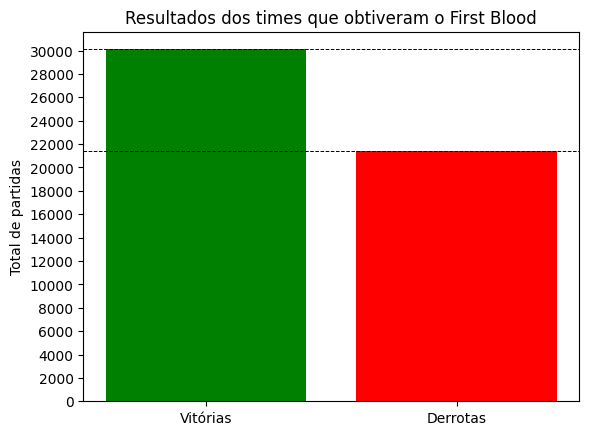

In [57]:
compara_vitorias(games, 'firstBlood', 'Resultados dos times que obtiveram o First Blood')

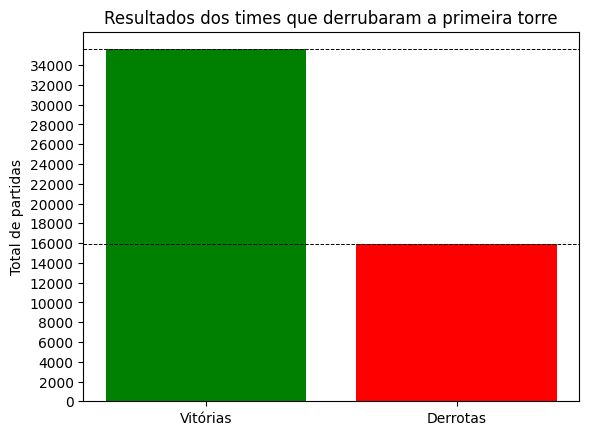

In [58]:
compara_vitorias(games, 'firstTower', 'Resultados dos times que derrubaram a primeira torre')

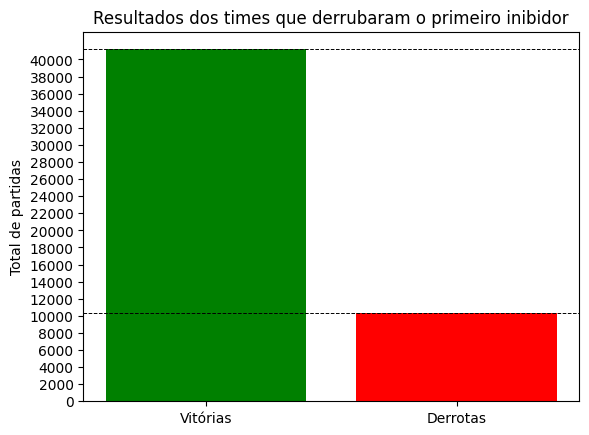

In [59]:
compara_vitorias(games, 'firstInhibitor', 'Resultados dos times que derrubaram o primeiro inibidor')

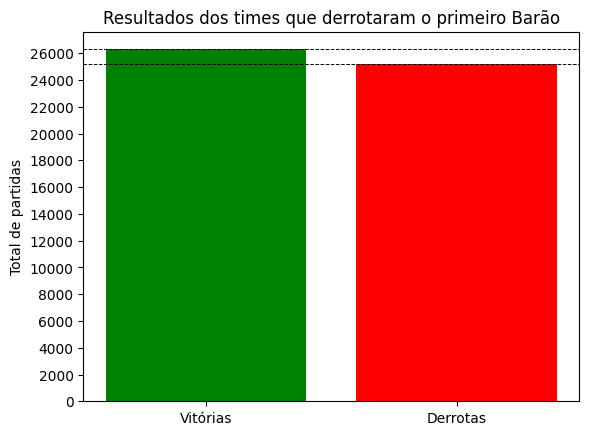

In [61]:
compara_vitorias(games, 'firstBaron', 'Resultados dos times que derrotaram o primeiro Barão')

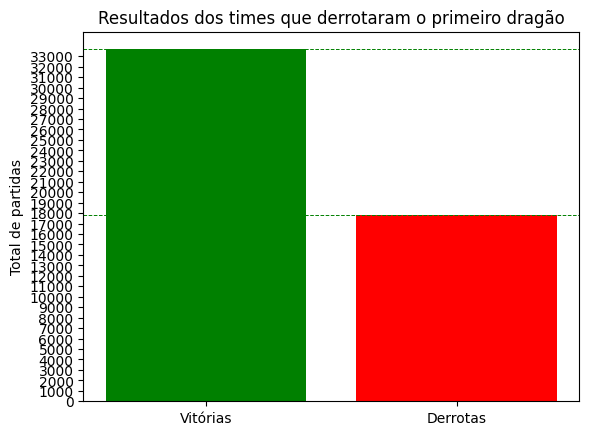

In [51]:
compara_vitorias(games, 'firstDragon', 'Resultados dos times que derrotaram o primeiro dragão')

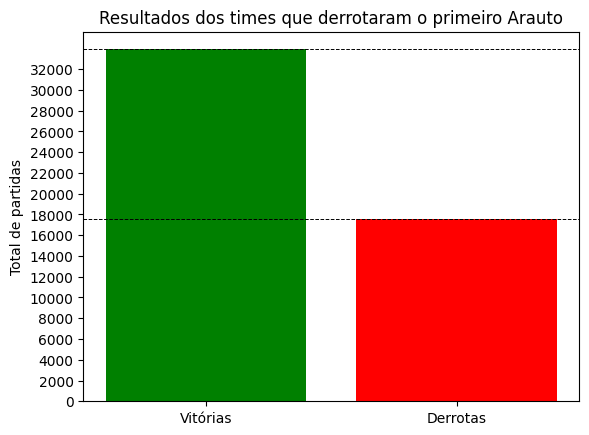

In [62]:
compara_vitorias(games, 'firstRiftHerald', 'Resultados dos times que derrotaram o primeiro Arauto')

In [73]:
def objetivo_x_vitoria(df:pd.DataFrame, columns:str, title:str):

  title = 'Total de torres destruídas a cada vitória'
  column = '_towerKills'
  contagem = np.where(games['winner'] == 1, games[f't1{column}'], games[f't2{column}'])
  contagem = pd.Series(contagem).value_counts()

  labels = contagem.index

  fig, ax = plt.subplots()

  ax.bar(labels, contagem)

  ax.set_xticks(contagem.index)
  ax.set_yticks(range(0, max(contagem), 1000))

  for topo in contagem:
      ax.axhline(topo, color='black', linestyle='--', linewidth=0.7)

  ax.set_title(title)
  ax.set_xlabel('Total de torres destruídas')
  ax.set_ylabel('Total de partidas')

  plt.show()

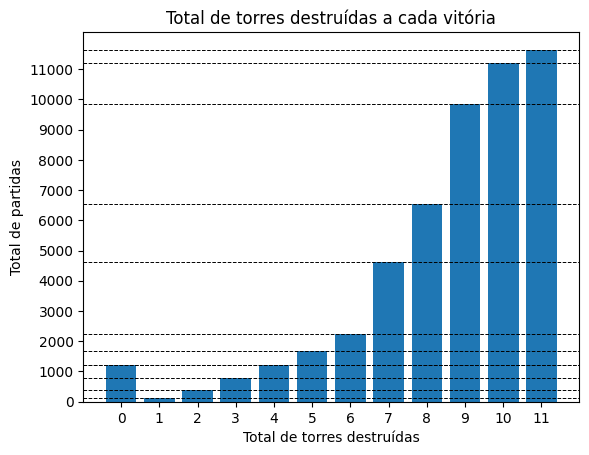

In [75]:
objetivo_x_vitoria(games, '_towerKills', 'Total de torres destruídas em vitórias')

In [ ]:
#'t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
#       't2_riftHeraldKills'